In [1]:
import matplotlib.pyplot as plt
import centralities
import graph_handling
import warnings

warnings.filterwarnings('ignore')

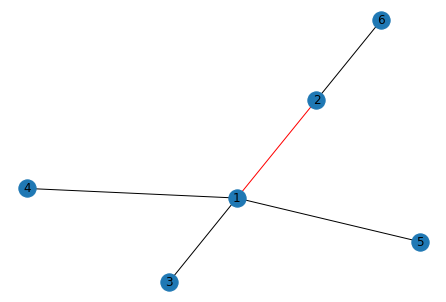

In [2]:
new_edge=(1, 2)
k, head, tail = 10, 6, 3
graph, new_graph = graph_handling.create(new_edge[0], new_edge[1])
graph_handling.show(graph, new_edge[0], new_edge[1])

This is the graph. the red edge is the one we are adding.

In [3]:
centralities.eigenvector_seeley(new_graph, False)[new_edge[0]]-centralities.eigenvector_seeley(graph, False)[new_edge[0]]

-0.06992000000000004

This is the score difference for the first node after and before adding the edge. It is negative probably because the graph befire adding the edge is disconnected

In [4]:
centralities.eigenvector_seeley(new_graph, False)[new_edge[1]]-centralities.eigenvector_seeley(graph, False)[new_edge[1]]

0.18597

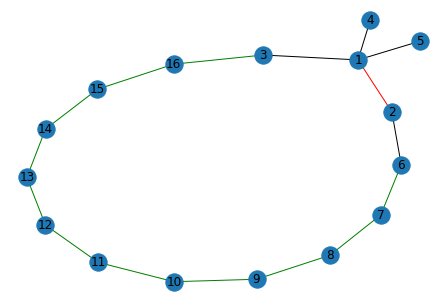

In [5]:
path = graph_handling.k_path(new_graph, k, head, tail)
k_path_edges = list(set(path.edges) - set(new_graph.edges))

graph_handling.show(path, new_edge[0], new_edge[1], k_path_edges)

#for i in range(k+1):
#    path_graph = graph_handling.k_path(new_graph, i, head, tail)
#    k_path_graph_edges = list(set(path_graph.edges) - set(new_graph.edges))
#    graph_handling.show(path_graph, new_edge[0], new_edge[1], k_path_graph_edges)

This is the "k_path graph". We choose a "head" and a "tail" and we create a path of length k from the first to the second and add it to the graph.


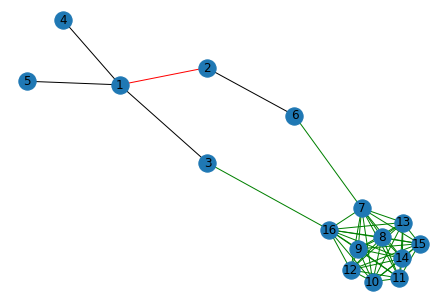

In [6]:
clique = graph_handling.k_clique(new_graph, k, head, tail)
k_clique_edges = list(set(clique.edges) - set(new_graph.edges))

graph_handling.show(clique, new_edge[0], new_edge[1], k_clique_edges)

#for i in range(k+1):
#    clique_graph = graph_handling.k_clique(new_graph, i, head, tail)
#    k_clique_graph_edges = list(set(clique_graph.edges) - set(new_graph.edges))
#    graph_handling.show(clique_graph, new_edge[0], new_edge[1], k_clique_graph_edges)

This is the "k_clique graph". We choose a "head" and a "tail" and we create a clique of dimension k connected to them, adding it to the graph

This is the score difference for the second node after and before adding the edge.

In [7]:
# computing scores for old and new k_path and k_clique graph
k_path_score, k_clique_score = centralities.eigenvector_at_k(graph, k, head, tail, False)
new_k_path_score, new_k_clique_score = centralities.eigenvector_at_k(new_graph, k, head, tail, False)

for k,v in k_path_score.items():
    print('k:' + str(k) + ' -> ' + str(v))

k:0 -> {1: 0.26007, 2: 0.0845, 3: 0.22123, 4: 0.13673, 5: 0.13673, 6: 0.16073}
k:1 -> {1: 0.22474, 2: 0.06022, 3: 0.2015, 4: 0.11634, 5: 0.11634, 6: 0.11634, 7: 0.16452}
k:2 -> {1: 0.19745, 2: 0.04507, 3: 0.18247, 4: 0.10126, 5: 0.10126, 6: 0.08787, 7: 0.12627, 8: 0.15834}
k:3 -> {1: 0.17587, 2: 0.03499, 3: 0.16567, 4: 0.08966, 5: 0.08966, 6: 0.06862, 7: 0.09963, 8: 0.1268, 9: 0.1491}
k:4 -> {1: 0.15846, 2: 0.02794, 3: 0.1512, 4: 0.08045, 5: 0.08045, 6: 0.05503, 7: 0.08045, 8: 0.10342, 9: 0.12326, 10: 0.13934}
k:5 -> {1: 0.14412, 2: 0.02283, 3: 0.13878, 4: 0.07296, 5: 0.07296, 6: 0.04509, 7: 0.06625, 8: 0.08577, 9: 0.10318, 10: 0.11805, 11: 0.13001}
k:6 -> {1: 0.13214, 2: 0.019, 3: 0.12809, 4: 0.06675, 5: 0.06675, 6: 0.03761, 7: 0.05546, 8: 0.07217, 9: 0.08742, 10: 0.10089, 11: 0.1123, 12: 0.12143}
k:7 -> {1: 0.12197, 2: 0.01606, 3: 0.11883, 4: 0.06151, 5: 0.06151, 6: 0.03184, 7: 0.04708, 8: 0.06151, 9: 0.07489, 10: 0.08699, 11: 0.0976, 12: 0.10654, 13: 0.11366}
k:8 -> {1: 0.11324, 2: 

We obtain for every value of k the scores of each node of the k_path graph, according to k.

In [8]:
# path
first_node_scores_path = [k_path_score[k][new_edge[0]] for k in k_path_score.keys()]
second_node_scores_path = [k_path_score[k][new_edge[1]] for k in k_path_score.keys()]

new_first_node_scores_path = [new_k_path_score[k][new_edge[0]] for k in new_k_path_score.keys()]
new_second_node_scores_path = [new_k_path_score[k][new_edge[1]] for k in new_k_path_score.keys()]

first_node_diff_path = [x - y for x, y in zip(new_first_node_scores_path, first_node_scores_path)]
second_node_diff_path = [x - y for x, y in zip(new_second_node_scores_path, second_node_scores_path)]

# clique
first_node_scores_clique = [k_clique_score[k][new_edge[0]] for k in k_clique_score.keys()]
second_node_scores_clique = [k_clique_score[k][new_edge[1]] for k in k_clique_score.keys()]

new_first_node_scores_clique = [new_k_clique_score[k][new_edge[0]] for k in new_k_clique_score.keys()]
new_second_node_scores_clique = [new_k_clique_score[k][new_edge[1]] for k in new_k_clique_score.keys()]

first_node_diff_clique = [x - y for x, y in zip(new_first_node_scores_clique, first_node_scores_clique)]
second_node_diff_clique = [x - y for x, y in zip(new_second_node_scores_clique, second_node_scores_clique)]

In [9]:
print(first_node_scores_path)
print(new_first_node_scores_path)

[0.26007, 0.22474, 0.19745, 0.17587, 0.15846, 0.14412, 0.13214, 0.12197, 0.11324, 0.10568, 0.09905]
[0.256, 0.23007, 0.21352, 0.20265, 0.19541, 0.19056, 0.18733, 0.18518, 0.18376, 0.18283, (0.18222-0j)]


These are the scores of the first node before and after adding the edge for increasing values of k in the k_path graph.

In [10]:
print(second_node_scores_path)
print(new_second_node_scores_path)

[0.0845, 0.06022, 0.04507, 0.03499, 0.02794, 0.02283, 0.019, 0.01606, 0.01375, 0.01191, 0.01041]
[0.18102, 0.15756, 0.14324, 0.13408, 0.1281, 0.12415, 0.12154, 0.11981, 0.11868, 0.11793, (0.11745-0j)]


These are the scores of the second node before and after adding the edge for increasing values of k in the k_path graph.

In [11]:
print([round(x, 6) for x in first_node_diff_path])
print([round(x, 6) for x in second_node_diff_path])

[-0.00407, 0.00533, 0.01607, 0.02678, 0.03695, 0.04644, 0.05519, 0.06321, 0.07052, 0.07715, (0.08317-0j)]
[0.09652, 0.09734, 0.09817, 0.09909, 0.10016, 0.10132, 0.10254, 0.10375, 0.10493, 0.10602, (0.10704-0j)]


These are the score differences between the first and the second node, respectively, for increasing values of k in the k_path graph.

In [12]:
print('Scores of node ' + str(new_edge[0]) + ' before and after adding the edge for increasing values of k:')
print(first_node_scores_clique)
print(new_first_node_scores_clique)
print('\n')
print('Scores of node ' + str(new_edge[1]) + ' before and after adding the edge for increasing values of k:')
print(second_node_scores_clique)
print(new_second_node_scores_clique)
print('\n')
print('Differences in node ' + str(new_edge[0]) + ' and ' +  str(new_edge[1]) + ' for increasing values of k')
print([round(x, 6) for x in first_node_diff_clique])
print([round(x, 6) for x in second_node_diff_clique])

Scores of node 1 before and after adding the edge for increasing values of k:
[0.26007, 0.22474, 0.19745, 0.07821, 0.02876, 0.01303, 0.0069, 0.00409, 0.00261, 0.00177, 0.00125]
[0.256, 0.23007, 0.21352, 0.12557, 0.0431, 0.01749, 0.00868, 0.00492, 0.00306, 0.00203, 0.00141]


Scores of node 2 before and after adding the edge for increasing values of k:
[0.0845, 0.06022, 0.04507, 0.04372, 0.02241, 0.01138, 0.00634, 0.00386, 0.00251, 0.00171, 0.00122]
[0.18102, 0.15756, 0.14324, 0.09203, 0.03611, 0.01574, 0.0081, 0.00468, 0.00294, 0.00197, 0.00138]


Differences in node 1 and 2 for increasing values of k
[-0.00407, 0.00533, 0.01607, 0.04736, 0.01434, 0.00446, 0.00178, 0.00083, 0.00045, 0.00026, 0.00016]
[0.09652, 0.09734, 0.09817, 0.04831, 0.0137, 0.00436, 0.00176, 0.00082, 0.00043, 0.00026, 0.00016]


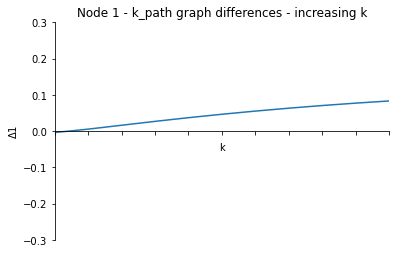

In [13]:
graph_handling.show_diff(first_node_diff_path, 'Node ' + str(new_edge[0]) + ' - k_path graph differences - increasing k', new_edge[0])

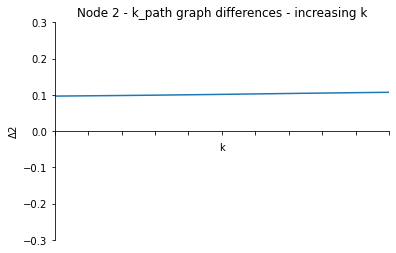

In [14]:
graph_handling.show_diff(second_node_diff_path, 'Node ' + str(new_edge[1]) + ' - k_path graph differences - increasing k', new_edge[1])

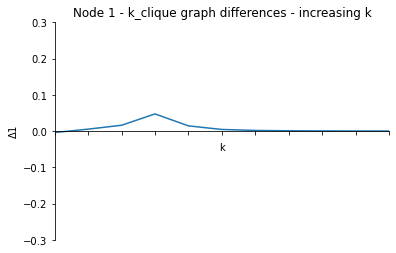

In [15]:
graph_handling.show_diff(first_node_diff_clique, 'Node ' + str(new_edge[0]) + ' - k_clique graph differences - increasing k', new_edge[0])

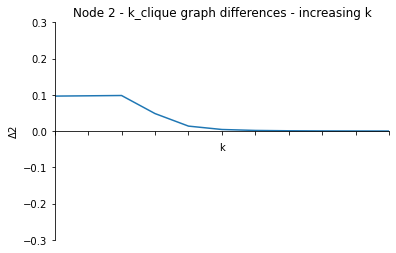

In [16]:
graph_handling.show_diff(second_node_diff_clique, 'Node ' + str(new_edge[1]) + ' - k_clique graph differences - increasing k', new_edge[1])

These plots show how the difference of the scores of the two nodes change before and after adding the edge for increasing value of k in the k_path and k_clique graphs.